<a href="https://colab.research.google.com/github/quocthang-98/deeplearning_lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing the Perceptron Algorithm in "Just" Python

In this lab, you are asked to implement the classic Perceptron by Frank Rosenblatt for binary classification (here: 0/1 class labels), which we have discussed in the lecture.

In particular, you should only use "basic" or "vanilla" Python functions for this implementation. Hence, no `import`s besides matplotlib will be permitted for this homework.

The goal of this lab is to familiarize yourself with NumPy implementation that we discussed in class. Hence, you may wish to explore the NumPy code from the lecture further when you implement the Perceptron in "pure" Python. Note that you are also asked to use the overal structure of the `Perceptron` Python `class`. While it may seem strange to you at first, it will be useful later when will discuss PyTorch for deep learning. The way PyTorch works is similar to this class (i.e., using a model `class` with `forward` and `backward` methods).

## 0) Imports

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the dataset

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [25]:
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))

print(len(X), len(y))

100 100


In [30]:
import random


random.seed(123)

idx = list(range(len(X)))
random.shuffle(idx)

X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

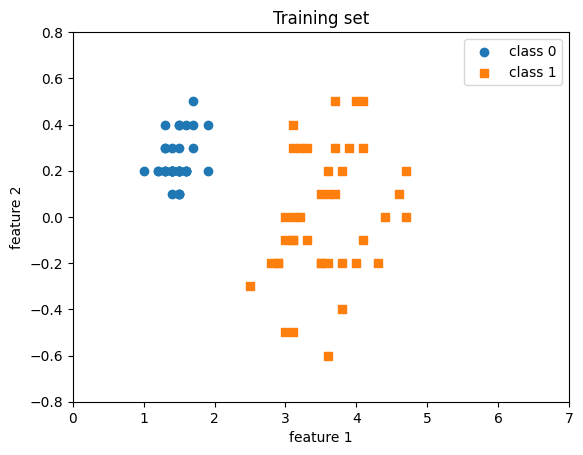

In [27]:
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## Defining the Perceptron model

Below, you need to complete the code of the Perceptron model class based on the framework I provided.

In [28]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = # <your code>
        self.bias = # <your code>

    def forward(self, x):
        linear = # <your code>
        prediction = # <your code>
        return prediction

    def backward(self, x, y):
        # <your code> to compute the prediction error

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(len(y)):
                # <your code> to update the weights and bias

    def evaluate(self, x, y):
        # <your code> to compute the prediction accuracy
        return accuracy

SyntaxError: invalid syntax (<ipython-input-28-41b22e303d99>, line 3)

In [36]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = [0.0] * num_features
        self.bias = 0.0

    def forward(self, x):
        linear = sum(x[i] * self.weights[i] for i in range(len(x))) + self.bias
        prediction = 1 if linear >= 0 else 0
        return prediction

    def backward(self, x, y):
        prediction = self.forward(x)
        error = y - prediction
        return error

    def train(self, X, y, epochs, learning_rate=0.1):
        for e in range(epochs):
            for i in range(len(y)):
                x = X[i]
                error = self.backward(x, y[i])
                for j in range(len(self.weights)):
                    self.weights[j] += learning_rate * error * x[j]
                self.bias += learning_rate * error

    def evaluate(self, X, y):
        correct = 0
        for i in range(len(y)):
            x = X[i]
            prediction = self.forward(x)
            if prediction == y[i]:
                correct += 1
        accuracy = correct / len(y)
        return accuracy

## Training the Perceptron

Here, you are asked to train the perceptron for 5 epochs and print out the Perceptron weight parameters and the value of the bias unit after training.

- The code should be relatively similar to the code you've seen in the lecture.

In [ ]:
ppn = Perceptron(num_features=2)

# <your code>

In [41]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Weights: [0.1799999999999999, -0.13000000000000006]
Bias: -0.4


## Evaluating the model

Compute the prediction accuracy (in percent) for both the training set and the test set.

In [9]:
# <your code>
print('Train set accuracy: %.2f%%' % (train_acc*100))

NameError: name 'train_acc' is not defined

In [42]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [ ]:
# <your code>
print('Test set accuracy: %.2f%%' % (test_acc*100))

In [39]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## Decision Boundary

Make 2 scatterplots: 1 for the training dataset and 1 for the test dataset. Draw the respective decision boundaries of the perceptron in each plot (similar to the code example you have seen in the lecture).

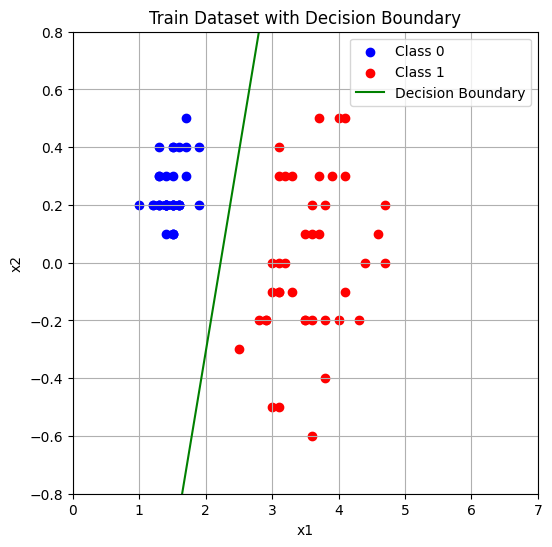

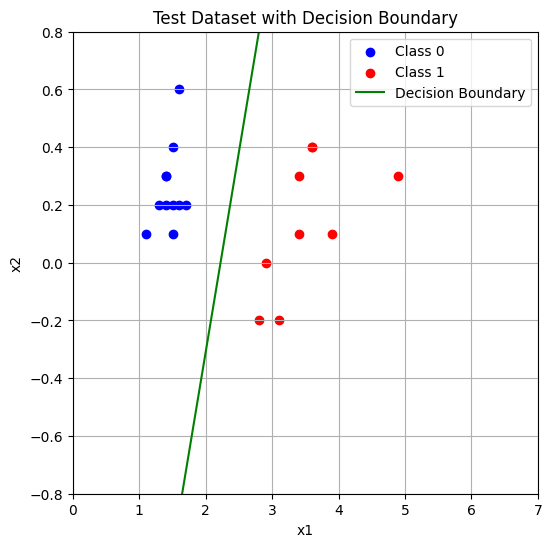

In [48]:
##########################
### 2D Decision Boundary
##########################

# <your code>

def plot_decision_boundary(X, y, weights, bias, title):
    plt.figure(figsize=(6, 6))

    # Separate points by class
    class_0 = [X[i] for i in range(len(y)) if y[i] == 0]
    class_1 = [X[i] for i in range(len(y)) if y[i] == 1]

    # Plot data points for each class
    plt.scatter([x[0] for x in class_0], [x[1] for x in class_0], color="blue", label="Class 0")
    plt.scatter([x[0] for x in class_1], [x[1] for x in class_1], color="red", label="Class 1")

    # Calculate decision boundary
    x_values = [0, 100]
    if weights[1] != 0:  # Avoid division by zero
        y_values = [-(weights[0] * x + bias) / weights[1] for x in x_values]
    else:
        y_values = [0, 0]

    # Plot decision boundary
    plt.plot(x_values, y_values, label="Decision Boundary", color="green")
    plt.xlim([0.0, 7])
    plt.ylim([-0.8, 0.8])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot test dataset with decision boundary
plot_decision_boundary(X_train, y_train, ppn.weights, ppn.bias, "Train Dataset with Decision Boundary")
plot_decision_boundary(X_test, y_test, ppn.weights, ppn.bias, "Test Dataset with Decision Boundary")
